In [1]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import keras
from keras.layers import Input, Dense, Lambda, Flatten, Reshape, Conv1D
from keras.layers import Conv2D, Conv2DTranspose
from keras.models import Model
from keras import backend as K
from keras import metrics
from keras.datasets import mnist

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import config
import os, numpy as np, pandas, sklearn, scipy.signal as signal
import mido
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# local libs
import config, models, functions
from data import data, midi, midi_generators as g
from utils import io, models_io, utils, plot

 Context :: namedtuple(
[ max_t = float
, dt = float
, n_instances = int
, note_length = int
, bpm = float
, tempo = float
, ticks_per_beat = int
]



In [4]:
context = data.init()
n = 2
multiTrack = True
context, x_train, labels = data.import_data(data.init(), n, multiTrack=multiTrack)

Setting up params

max min f 25.0 0.3333333333333333
 >> Context(max_t=3.0, dt=0.02, n_instances=150, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
Setting up params

max min f 25.0 0.3333333333333333
 >> Context(max_t=3.0, dt=0.02, n_instances=150, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
Importing midi-data

 [INFO] : 
 |  reading file: ../datasets/examples/01 16th Snare.mid
 [INFO] : 
 |  reading file: ../datasets/examples/01 8th Cym.mid

Encoding midi-data
 [<midi file '../datasets/examples/01 16th Snare.mid' type 0, 1 tracks, 182 messages>, <midi file '../datasets/examples/01 8th Cym.mid' type 0, 1 tracks, 68 messages>]
> -> multi-track = True
<meta message track_name name='01 16th Snare\x00' time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=36 notated_32nd_notes_per_beat=8 time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=36 notated_32nd_notes_per_beat=8 time=0>
note_on channel=0 no

In [5]:
n = 100
min_f = 3
max_f = 15
# x_train = g.gen_data(context, n, max_f=max_f, min_f=min_f)
# x_train = g.gen_data_complex(context, n, max_f=max_f, min_f=min_f, multiTrack=multiTrack)
x_train = g.gen_data_complex(context, n, max_f=max_f, min_f=min_f, 
    n_polyrythms=1,
    n_channels=midi.N_NOTES,
    multiTrack=multiTrack)

note_on channel=0 note=62 velocity=127 time=0.06458333333333333
note_on channel=0 note=61 velocity=127 time=0.016666666666666666
note_off channel=0 note=62 velocity=127 time=0.003125
note_off channel=0 note=61 velocity=127 time=0.016666666666666666
note_on channel=0 note=61 velocity=127 time=0.11979166666666667
note_on channel=0 note=62 velocity=127 time=0.005208333333333333
note_on channel=0 note=60 velocity=127 time=0.0020833333333333333
note_off channel=0 note=61 velocity=127 time=0.0125
note_off channel=0 note=62 velocity=127 time=0.005208333333333333
note_off channel=0 note=60 velocity=127 time=0.0020833333333333333
note_on channel=0 note=61 velocity=127 time=0.1125
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.007291666666666667
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.09270833333333334
note_off channel=0 note=61 velocity=127 time=0.019791666666

note_on channel=0 note=60 velocity=127 time=0.0010416666666666667
note_on channel=0 note=61 velocity=127 time=0.0125
note_off channel=0 note=60 velocity=127 time=0.007291666666666667
note_off channel=0 note=61 velocity=127 time=0.0125
note_on channel=0 note=62 velocity=127 time=0.04791666666666666
note_on channel=0 note=61 velocity=127 time=0.005208333333333333
note_off channel=0 note=62 velocity=127 time=0.014583333333333334
note_off channel=0 note=61 velocity=127 time=0.005208333333333333
note_on channel=0 note=61 velocity=127 time=0.053125
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.0020833333333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.029166666666666667
note_on channel=0 note=61 velocity=127 time=0.0010416666666666667
note_off channel=0 note=60 velocity=127 time=0.01875
note_off channel=0 note=61 velocity=127 time=0.0010416666666666667
no

note_on channel=0 note=62 velocity=127 time=0.07604166666666666
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.041666666666666664
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.008333333333333333
note_on channel=0 note=61 velocity=127 time=0.01875
note_off channel=0 note=62 velocity=127 time=0.0010416666666666667
note_off channel=0 note=61 velocity=127 time=0.01875
note_on channel=0 note=62 velocity=127 time=0.051041666666666666
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.06979166666666667
note_on channel=0 note=60 velocity=127 time=0.0125
note_off channel=0 note=62 velocity=127 time=0.007291666666666667
note_off channel=0 note=60 velocity=127 time=0.0125
note_on channel=0 note=62 velocity=127 time=0.057291666666666664
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on

note_off channel=0 note=60 velocity=127 time=0.01875
note_on channel=0 note=62 velocity=127 time=0.052083333333333336
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.03958333333333333
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.011458333333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.06979166666666667
note_on channel=0 note=61 velocity=127 time=0.009375
note_on channel=0 note=60 velocity=127 time=0
note_off channel=0 note=62 velocity=127 time=0.010416666666666666
note_off channel=0 note=61 velocity=127 time=0.009375
note_off channel=0 note=60 velocity=127 time=0
note_on channel=0 note=62 velocity=127 time=0.06041666666666667
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.030208333333333334
note_off channel=0 note=60 vel

note_off channel=0 note=60 velocity=127 time=0.007291666666666667
note_off channel=0 note=62 velocity=127 time=0.0125
note_on channel=0 note=61 velocity=127 time=0.053125
note_on channel=0 note=62 velocity=127 time=0.0020833333333333333
note_on channel=0 note=60 velocity=127 time=0.0020833333333333333
note_off channel=0 note=61 velocity=127 time=0.016666666666666666
note_off channel=0 note=62 velocity=127 time=0.0020833333333333333
note_off channel=0 note=60 velocity=127 time=0.0020833333333333333
note_on channel=0 note=62 velocity=127 time=0.053125
note_on channel=0 note=60 velocity=127 time=0.016666666666666666
note_off channel=0 note=62 velocity=127 time=0.003125
note_off channel=0 note=60 velocity=127 time=0.016666666666666666
note_on channel=0 note=62 velocity=127 time=0.03854166666666667
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.011458333333333333
note_off channel=0 note=60 velocity=127 time=0.01979166666666666

note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.005208333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.09270833333333334
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.008333333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.04583333333333333
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.02395833333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.011458333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.08645833333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 not

note_on channel=0 note=60 velocity=127 time=0.035416666666666666
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.028125
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.007291666666666667
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.034375
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.05520833333333333
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.019791666666666666
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.014583333333333334
note_off channel=0 note=60 velocity=127 time=0.019791666666666

note_on channel=0 note=61 velocity=127 time=0.021875
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.010416666666666666
note_on channel=0 note=60 velocity=127 time=0.00625
note_off channel=0 note=62 velocity=127 time=0.013541666666666667
note_off channel=0 note=60 velocity=127 time=0.00625
note_on channel=0 note=62 velocity=127 time=0.046875
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.009375
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.02395833333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.03229166666666666
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=

note_on channel=0 note=62 velocity=127 time=0.009375
note_off channel=0 note=61 velocity=127 time=0.011458333333333333
note_off channel=0 note=62 velocity=127 time=0.009375
note_on channel=0 note=60 velocity=127 time=0.040625
note_on channel=0 note=62 velocity=127 time=0.010416666666666666
note_off channel=0 note=60 velocity=127 time=0.009375
note_off channel=0 note=62 velocity=127 time=0.010416666666666666
note_on channel=0 note=62 velocity=127 time=0.051041666666666666
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.0010416666666666667
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.0020833333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.008333333333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.03229166666666666

note_on channel=0 note=62 velocity=127 time=0.005208333333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.04479166666666667
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.0010416666666666667
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.051041666666666666
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.019791666666666666
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.005208333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.065625
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.015625000000002
 |>  150
note_on channel=0 note=62 velocity=127 time=0.02395833333333333
note_off channe

note_on channel=0 note=62 velocity=127 time=0.07291666666666667
note_on channel=0 note=61 velocity=127 time=0.00625
note_off channel=0 note=62 velocity=127 time=0.013541666666666667
note_off channel=0 note=61 velocity=127 time=0.00625
note_on channel=0 note=60 velocity=127 time=0.0125
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.04895833333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.026041666666666668
note_on channel=0 note=62 velocity=127 time=0.011458333333333333
note_off channel=0 note=60 velocity=127 time=0.009375
note_off channel=0 note=62 velocity=127 time=0.011458333333333333
note_on channel=0 note=61 velocity=127 time=0.02395833333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.03958333333333333
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on 

note_on channel=0 note=60 velocity=127 time=0.008333333333333333
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.06354166666666666
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.017708333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.025
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.0010416666666666667
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.042708333333333334
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.0010416666666666667
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.042708333333333334
note_off channel=0 note=60 veloc

note_on channel=0 note=61 velocity=127 time=0.005208333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.013541666666666667
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.025
note_on channel=0 note=61 velocity=127 time=0.003125
note_off channel=0 note=60 velocity=127 time=0.016666666666666666
note_off channel=0 note=61 velocity=127 time=0.003125
note_on channel=0 note=61 velocity=127 time=0.0625
note_on channel=0 note=60 velocity=127 time=0.0020833333333333333
note_on channel=0 note=62 velocity=127 time=0.016666666666666666
note_off channel=0 note=61 velocity=127 time=0.0010416666666666667
note_off channel=0 note=60 velocity=127 time=0.0020833333333333333
note_off channel=0 note=62 velocity=127 time=0.016666666666666666
note_on channel=0 note=61 velocity=127 time=0.04375
note_on channel=0 note=60 velocity=127 time=0.00625
note_off channel=0 note=61 ve

note_on channel=0 note=62 velocity=127 time=0.0125
note_off channel=0 note=60 velocity=127 time=0.007291666666666667
note_off channel=0 note=62 velocity=127 time=0.0125
note_on channel=0 note=61 velocity=127 time=0
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.04479166666666667
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.010416666666666666
note_on channel=0 note=60 velocity=127 time=0.019791666666666666
note_off channel=0 note=61 velocity=127 time=0
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.014583333333333334
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.020833333333333332
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.02395833333333333
note_off channel=0 n

note_off channel=0 note=60 velocity=127 time=0.019791666666666666
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.997916666666669
 |>  150
note_on channel=0 note=62 velocity=127 time=0.00625
note_on channel=0 note=61 velocity=127 time=0.00625
note_off channel=0 note=62 velocity=127 time=0.014583333333333334
note_off channel=0 note=61 velocity=127 time=0.00625
note_on channel=0 note=60 velocity=127 time=0.003125
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.02395833333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.011458333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.0020833333333333333
note_on channel=0 note=62 velocity=127 time=0.01875
note_off channel=0 note=60 velocity=127 time=0.0010416666666666667
note_off channel=0 note=62 velocity=127 time=0.01875
note_on cha

note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.041666666666666664
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.05416666666666667
note_on channel=0 note=61 velocity=127 time=0.014583333333333334
note_off channel=0 note=60 velocity=127 time=0.005208333333333333
note_off channel=0 note=61 velocity=127 time=0.014583333333333334
note_on channel=0 note=62 velocity=127 time=0.04895833333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.06041666666666667
note_on channel=0 note=60 velocity=127 time=0.013541666666666667
note_off channel=0 note=61 velocity=127 time=0.00625
note_off channel=0 note=60 velocity=127 time=0.013541666666666667
note_on channel=0 note=62 velocity=127 time=0.04375
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.

note_off channel=0 note=61 velocity=127 time=0.0020833333333333333
note_off channel=0 note=60 velocity=127 time=0.015625
note_off channel=0 note=62 velocity=127 time=0.0020833333333333333
note_on channel=0 note=61 velocity=127 time=0.03333333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.05
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.05
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.030208333333333334
note_on channel=0 note=60 velocity=127 time=0.016666666666666666
note_off channel=0 note=61 velocity=127 time=0.003125
note_off channel=0 note=60 velocity=127 time=0.016666666666666666
note_on channel=0 note=61 velocity=127 time=0.03333333333333333
note_off channel=0 note=61

note_on channel=0 note=61 velocity=127 time=0.020833333333333332
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.02395833333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.035416666666666666
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.0125
note_on channel=0 note=62 velocity=127 time=0.009375
note_off channel=0 note=60 velocity=127 time=0.010416666666666666
note_off channel=0 note=62 velocity=127 time=0.009375
note_on channel=0 note=61 velocity=127 time=0.0375
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.019791666666666666
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.03958333333333333
note_on channel=0 note=60 velocity=127 time=0.00625
note_off channel=0 n

note_on channel=0 note=61 velocity=127 time=0.036458333333333336
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.040625
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.008333333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.06979166666666667
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.04479166666666667
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.005208333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.0010416666666666667
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.04895833333333333
note_off channel=0 note=61 veloc

note_off channel=0 note=60 velocity=127 time=0.007291666666666667
note_off channel=0 note=61 velocity=127 time=0.0125
note_on channel=0 note=62 velocity=127 time=0.003125
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.03854166666666667
note_on channel=0 note=61 velocity=127 time=0.003125
note_off channel=0 note=60 velocity=127 time=0.016666666666666666
note_off channel=0 note=61 velocity=127 time=0.003125
note_on channel=0 note=62 velocity=127 time=0.022916666666666665
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.021875
note_on channel=0 note=60 velocity=127 time=0.00625
note_off channel=0 note=61 velocity=127 time=0.013541666666666667
note_off channel=0 note=60 velocity=127 time=0.00625
note_on channel=0 note=62 velocity=127 time=0.036458333333333336
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 t

note_on channel=0 note=61 velocity=127 time=0.011458333333333333
note_off channel=0 note=62 velocity=127 time=0.008333333333333333
note_off channel=0 note=61 velocity=127 time=0.011458333333333333
note_on channel=0 note=60 velocity=127 time=0.022916666666666665
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.03229166666666666
note_on channel=0 note=62 velocity=127 time=0.014583333333333334
note_off channel=0 note=61 velocity=127 time=0.005208333333333333
note_off channel=0 note=62 velocity=127 time=0.014583333333333334
note_on channel=0 note=60 velocity=127 time=0.003125
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.0375
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.011458333333333333
note_on channel=0 note=62 velocity=127 time=0.009375
note_off channel=0 note=60 velocity=127 time=0.0104166666

note_on channel=0 note=62 velocity=127 time=0.11770833333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.00625
note_on channel=0 note=61 velocity=127 time=0.0020833333333333333
note_off channel=0 note=60 velocity=127 time=0.017708333333333333
note_off channel=0 note=61 velocity=127 time=0.0020833333333333333
note_on channel=0 note=62 velocity=127 time=0.08645833333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.103125
note_on channel=0 note=60 velocity=127 time=0.004166666666666667
note_on channel=0 note=62 velocity=127 time=0.008333333333333333
note_off channel=0 note=61 velocity=127 time=0.008333333333333333
note_off channel=0 note=60 velocity=127 time=0.004166666666666667
note_off channel=0 note=62 velocity=127 time=0.008333333333333333
note_on channel=0 note=62 velocity=127 time=0.11458333333333333
note_off channel=0 note=62 velocity=127 time

note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.04583333333333333
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.009375
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.00625
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.04895833333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.05416666666666667
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.0010416666666666667
note_on channel=0 note=62 velocity=127 time=0.00625
note_off channel=0 note=61 velocity=127 time=0.013541666666666667
note_off channel=0 note=62 velocity=127 time=0.00625
note_on channel=0 note=61 velocity=127 time=0.06875
note_off channel=0

note_off channel=0 note=62 velocity=127 time=0.00625
note_off channel=0 note=60 velocity=127 time=0.0020833333333333333
note_on channel=0 note=61 velocity=127 time=0.03958333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.04791666666666666
note_on channel=0 note=62 velocity=127 time=0.008333333333333333
note_off channel=0 note=61 velocity=127 time=0.011458333333333333
note_off channel=0 note=62 velocity=127 time=0.008333333333333333
note_on channel=0 note=61 velocity=127 time=0.03958333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.0010416666666666667
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.027083333333333334
note_on channel=0 note=62 velocity=127 time=0.010416666666666666
note_off channel=0 note=61 velocity=127 time=0.009375
note_off channel=0 note=62 velocity=127 tim

note_on channel=0 note=61 velocity=127 time=0.078125
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.00625
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.01875
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.998958333333334
 |>  150
note_on channel=0 note=62 velocity=127 time=0.034375
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.005208333333333333
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.06145833333333333
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.016666666666666666
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.021875
note_on channel=0 note=60 velocity=127 time=0.003125
note_off cha

note_on channel=0 note=62 velocity=127 time=0.011458333333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.007291666666666667
note_on channel=0 note=61 velocity=127 time=0.007291666666666667
note_off channel=0 note=60 velocity=127 time=0.0125
note_off channel=0 note=61 velocity=127 time=0.007291666666666667
note_on channel=0 note=62 velocity=127 time=0.03854166666666667
note_on channel=0 note=60 velocity=127 time=0.003125
note_on channel=0 note=61 velocity=127 time=0.005208333333333333
note_off channel=0 note=62 velocity=127 time=0.011458333333333333
note_off channel=0 note=60 velocity=127 time=0.003125
note_off channel=0 note=61 velocity=127 time=0.005208333333333333
note_on channel=0 note=60 velocity=127 time=0.042708333333333334
note_on channel=0 note=61 velocity=127 time=0.003125
note_off channel=0 note=60 velocity=127 time=0.016666666666666666
note_on channel=0 note=62 velocity=127 time=0.0020833333333333333
not

note_on channel=0 note=62 velocity=127 time=0.00625
note_off channel=0 note=60 velocity=127 time=0.013541666666666667
note_off channel=0 note=62 velocity=127 time=0.00625
note_on channel=0 note=61 velocity=127 time=0.019791666666666666
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.03958333333333333
note_on channel=0 note=62 velocity=127 time=0.011458333333333333
note_off channel=0 note=60 velocity=127 time=0.008333333333333333
note_off channel=0 note=62 velocity=127 time=0.011458333333333333
note_on channel=0 note=61 velocity=127 time=0.025
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.029166666666666667
note_on channel=0 note=62 velocity=127 time=0.016666666666666666
note_off channel=0 note=60 velocity=127 time=0.003125
note_off channel=0 note=62 velocity=127 time=0.016666666666666666
note_on channel=0 note=61 velocity=127 time=0.029166666666666667
note_o

note_off channel=0 note=60 velocity=127 time=0.013541666666666667
note_on channel=0 note=61 velocity=127 time=0.004166666666666667
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.0125
note_on channel=0 note=60 velocity=127 time=0.016666666666666666
note_off channel=0 note=62 velocity=127 time=0.003125
note_off channel=0 note=60 velocity=127 time=0.016666666666666666
note_on channel=0 note=62 velocity=127 time=0.03333333333333333
note_on channel=0 note=60 velocity=127 time=0.019791666666666666
note_off channel=0 note=62 velocity=127 time=0.0010416666666666667
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.030208333333333334
note_on channel=0 note=61 velocity=127 time=0.004166666666666667
note_off channel=0 note=62 velocity=127 time=0.015625
note_on channel=0 note=60 velocity=127 time=0.0020833333333333333
note_off channel=0 note=61 velocity=127 time=0.00208333

note_on channel=0 note=60 velocity=127 time=0.019791666666666666
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.052083333333333336
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.04583333333333333
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.046875
note_on channel=0 note=61 velocity=127 time=0.0020833333333333333
note_off channel=0 note=62 velocity=127 time=0.01875
note_off channel=0 note=61 velocity=127 time=0.0020833333333333333
note_on channel=0 note=60 velocity=127 time=0.05
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.040625
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.057291666666666664
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note

note_on channel=0 note=61 velocity=127 time=0.013541666666666667
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.014583333333333334
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.004166666666666667
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.009375
note_on channel=0 note=60 velocity=127 time=0.01875
note_off channel=0 note=61 velocity=127 time=0.0010416666666666667
note_off channel=0 note=60 velocity=127 time=0.01875
note_on channel=0 note=61 velocity=127 time=0.04895833333333333
note_on channel=0 note=60 velocity=127 time=0.003125
note_off channel=0 note=61 velocity=127 time=0.016666666666666666
note_off channel=0 note=60 velocity=127 time=0.003125
note_on channel=0 note=60 velocity=127 time=0.052083333333333336
note_on channel=0 note=61 velocity=127 time=0.011458333333333333
note_on channel

note_off channel=0 note=61 velocity=127 time=0.007291666666666667
note_off channel=0 note=62 velocity=127 time=0.0125
note_on channel=0 note=61 velocity=127 time=0.04479166666666667
note_on channel=0 note=62 velocity=127 time=0.00625
note_off channel=0 note=61 velocity=127 time=0.013541666666666667
note_off channel=0 note=62 velocity=127 time=0.00625
note_on channel=0 note=61 velocity=127 time=0.05
note_on channel=0 note=62 velocity=127 time=0
note_on channel=0 note=60 velocity=127 time=0.0010416666666666667
note_off channel=0 note=61 velocity=127 time=0.01875
note_off channel=0 note=62 velocity=127 time=0
note_off channel=0 note=60 velocity=127 time=0.0010416666666666667
note_on channel=0 note=62 velocity=127 time=0.05
note_on channel=0 note=61 velocity=127 time=0.005208333333333333
note_off channel=0 note=62 velocity=127 time=0.014583333333333334
note_off channel=0 note=61 velocity=127 time=0.005208333333333333
note_on channel=0 note=62 velocity=127 time=0.04583333333333333
note_on c

note_off channel=0 note=61 velocity=127 time=0.013541666666666667
note_off channel=0 note=62 velocity=127 time=0.00625
note_on channel=0 note=60 velocity=127 time=0.029166666666666667
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0
note_on channel=0 note=61 velocity=127 time=0.01875
note_off channel=0 note=62 velocity=127 time=0.0010416666666666667
note_off channel=0 note=61 velocity=127 time=0.01875
note_on channel=0 note=60 velocity=127 time=0.030208333333333334
note_on channel=0 note=62 velocity=127 time=0
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_off channel=0 note=62 velocity=127 time=0
note_on channel=0 note=61 velocity=127 time=0.02395833333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.005208333333333333
note_on channel=0 note=60 velocity=127 time=0.019791666666666666
note_off channel=0 note=62 velocity=127 time=0
n

In [27]:
n = 3
total = 1000 * 1
x_test = x_train[n:]
x_train = np.concatenate([x_train[:n] for _ in range(int(total/n))])

m (30, 3)


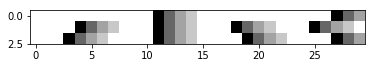

In [28]:
plot.multi(x_train[0, :30])

m (30, 3)


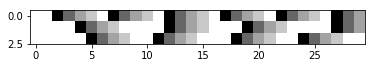

In [29]:
plot.multi(x_train[1, :30])

In [9]:
x_train.shape

(1000, 150, 3)

In [10]:
params = {'batch_size': 64, 'shuffle': True}

In [11]:
class DataGenerator(keras.utils.Sequence):
    def __init__(self, x, y=None, batch_size=32, shuffle=True, return_y=False):
        self.x = x
        self.y = y if y is not None else x
        self.return_y = return_y
        self.n = x.shape[0]
        self.batch_size = batch_size
        self.shuffle_samples = shuffle
        self.shuffle_notes = shuffle
        self.indices = []
        self.on_epoch_end()
    
    def on_epoch_end(self):
        self.indices = np.arange(self.n)
        if self.shuffle_samples:
            np.random.shuffle(self.indices)
    
    def __len__(self):
        # n batches / epoch = #samples / batch_size
        # floor() to prevent occurences of samples multiple times
        return int(np.floor(self.x.shape[0] / self.batch_size))
    
    def __data_generation(self, batch_indices):
        # x_batch :: (samples, timesteps, notes)
        if batch_indices[-1] > self.x.shape[0]:
            print('__data_generation - batch_indices too large', batch_indices[-1], self.x.shape)
        if not self.shuffle_notes:
            x_batch = self.x[batch_indices] # .copy() if mutating
        else:
            # gen batch placeholder
            x_batch = np.empty_like(self.x[batch_indices])
            for relative_batch_i, batch_i in enumerate(batch_indices):
                note_indices = np.arange(self.x.shape[-1])
                np.random.shuffle(note_indices)
                for note_i, note_j in enumerate(note_indices):
                    x_batch[relative_batch_i, :, note_i] = self.x[batch_i, :, note_j]
        if self.return_y:
            return x_batch, x_batch
        return x_batch, None

    def __getitem__(self, i):
        # get batch
        if i >= self.__len__():
            print('i >= __len__, index should be smaller', i, self.__len__())
            i -= 1
        batch_indices = np.arange(i * self.batch_size, (i + 1) * self.batch_size) - 1
        return self.__data_generation(batch_indices)

# training_gen = DataGenerator(x_train, x_train, **params)

In [30]:
img_dims = (28,28,1)
img_dims = x_train[0].shape
img_dims

(150, 3)

In [31]:
# input image dimensions
# no cols
img_rows, img_chns = img_dims
# number of convolutional filters to use
filters = 64
# convolution kernel size
num_conv = 3

batch_size = 100

original_img_size = (img_rows, img_chns)
original_input_size = original_img_size

latent_dim = 2
intermediate_dim = 128
epsilon_std = 1.0

In [32]:
encoder_input = Input(shape=original_img_size)

timesteps = original_img_size[-2]
notes = original_img_size[-1]
    
    # Convolve & Pool
h = encoder_input
h = Conv1D(32, kernel_size=2, strides=2, activation='relu', padding='same')(h)
# h = Conv1D(32, kernel_size=2, strides=1, activation='relu', padding='same')(h)
h = Conv1D(64, kernel_size=2, strides=1, activation='relu', padding='same')(h)

    # Dense layers
h = Flatten()(h)
h = Dense(intermediate_dim, activation='relu')(h)
#     h = Dense(intermediate_dim, activation='relu')(h)
#     h = Dense(intermediate_dim, activation='relu')(h)    
#     h = Dropout(0.1)(h) # uncomment when using larger batches
#     h = Dense(intermediate_dim, activation='relu')(h)
    # h = Dense(intermediate_dim, activation='relu', kernel_regularizer=k_reg, activity_regularizer=a_reg)(h)

    # Z Mean, Variance
z_mean = Dense(latent_dim, name='z_mean')(h) # , activation='relu'
z_log_var = Dense(latent_dim, name='z_log_var')(h) # , activation='relu'
    
encoder_output = [z_mean, z_log_var]

In [33]:
encoder_model = Model(encoder_input, encoder_output, name='encoder_model-')
encoder_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 150, 3)       0                                            
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 75, 32)       224         input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 75, 64)       4160        conv1d_3[0][0]                   
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 4800)         0           conv1d_4[0][0]                   
__________________________________________________________________________________________________
dense_5 (D

In [34]:
sample_ = lambda args: models.sample(args, z_mean, z_log_var, latent_dim, epsilon_std)

In [35]:
# z = Lambda(sampling)([z_mean, z_log_var])
z_input = encoder_model(encoder_input)
z_output = Lambda(sample_)(z_input)

In [36]:
def list_decoders(output_size, p='valid'):
    # decoder_input = z_output
    # h = decoder_input
    # :output_shape = (timesteps, channels, channels) || (batches, filters, timesteps, channels)
    # keras offers just Conv2DTranspose and not Conv1DTranspose
    # - use 2D images during upsampling :: (timesteps, notes, channels) => (timesteps, notes, filters)
    # - use 1D images to optimize reconstruction :: (timesteps, filters) => (timesteps, notes)
    
    # image_data_format = 'channels_last'
    # goal shape: (timesteps, notes, channels)
    # start with the 'reverse': lots of small imgs => few large img
    
    timesteps = output_size[-2] # cols
    notes = output_size[-1] # rows
    channels = 1 # rgb
    m = 4 # multiplier for dims
    
    # at the start of upsampling, the image-structure does not yet have to correspond to the goal structure 
    # ?TODO use y*y*y starting dims, may conv, and only then correct the structure (?)
    output_shape = (channels, notes * m, timesteps)
    
    # we instantiate these layers separately so as to reuse them later
    decoders = []
    decoders += [ Dense(intermediate_dim, activation='relu') ]
    decoders += [ Dense(np.prod(output_shape[-3:]), activation='relu') ]
    decoders += [ Reshape(output_shape[-3:]) ]
    
    # Convolve & Pool
    
    # Note that the kernel windows do not yet correspond to 'temporal' features, but rather to just spatial features
    k = (3,2) # (2,1) :: (timesteps, notes)
    s = (1,3)
    timesteps_ = int(timesteps / 2)
    
    decoders += [ Conv2DTranspose(timesteps_, kernel_size=k, strides=3, activation='relu', padding=p) ]
    decoders += [ Conv2DTranspose(32, kernel_size=k, strides=3, activation='relu', padding=p) ]
    # decoder += [Conv2DTranspose(32, kernel_size=k, strides=3, activation='relu', padding=p)]
    decoders += [ Conv2DTranspose(16, kernel_size=k, strides=(3,1), activation='relu', padding=p)]
    decoders += [ Conv2DTranspose(16, kernel_size=k, strides=3, activation='relu', padding=p)]
    
    # 'end' of upsampling
    decoders += [ Conv2D(1, kernel_size=(1,2), strides=1, activation='relu', padding=p) ]
    # shape = ()
    # decoder_reshape2 = Reshape(dims[0:2])
    # #     h = Conv1D(16, kernel_size=2, strides=1, activation='relu', padding=p)(h)
    # decoder_conv2 = Conv1D(notes * m, kernel_size=2, strides=2, activation='relu', padding=p)
    
    
    # Mean (output)
    #     h = Conv2D(1, kernel_size=1, strides=s, activation='sigmoid', padding='same')(h)
    output_shape = (timesteps, notes)
    
    decoders += [ Flatten()]
    decoders += [ Dense(np.prod(output_shape), activation='sigmoid')]
    decoders += [ Reshape(output_shape)]
    return decoders

In [37]:
decoders = list_decoders(original_input_size)

In [38]:
decoded = utils.composition(decoders, z_output, verbose=False)

In [39]:
# instantiate VAE model
vae_input = encoder_input
vae_output = decoded
vae = Model(vae_input, vae_output)
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 150, 3)       0                                            
__________________________________________________________________________________________________
encoder_model- (Model)          [(None, 2), (None, 2 619428      input_2[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 2)            0           encoder_model-[1][0]             
                                                                 encoder_model-[1][1]             
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 1800)         5400        lambda_2[0][0]                   
__________

In [40]:
# Compute VAE loss
# no img_cols! no notes!
def vae_loss(beta=1.):
    # y_true, y_pred, z_mean, z_log_var, timesteps=150, notes=3, beta=1.
    xent_loss = timesteps * keras.metrics.binary_crossentropy(K.flatten(vae_input), K.flatten(vae_output))
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    vae_loss = K.mean(xent_loss + kl_loss)
    return vae_loss

vae_loss = vae_loss()
vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')
# vae.compile(optimizer=optimizer, loss=loss, metrics=metrics)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Output "reshape_4" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "reshape_4" during training.
  if sys.path[0] == '':


In [41]:
# train the VAE on MNIST digits
# (x_train, _), (x_test, y_test) = mnist.load_data()
x_test = x_train[-100:]
y_test = x_test

In [42]:
x_train.shape

(999, 150, 3)

In [43]:
print('x_train.shape:', x_train.shape)

x_train.shape: (999, 150, 3)


In [44]:
epochs = 50
X = DataGenerator(x_train, **params)
# history = vae.fit(x_train,shuffle=True, epochs=epochs, batch_size=batch_size, validation_data=(x_test, None))
history = vae.fit_generator(
    X, epochs=epochs, steps_per_epoch=X.__len__(),
    use_multiprocessing=True, workers=2,
    validation_data=(x_test, None))

Epoch 1/50
15/15 [==============================] - 16s 1s/step - loss: 85.3976 - val_loss: 80.6826
Epoch 2/50
15/15 [==============================] - 14s 945ms/step - loss: 81.7231 - val_loss: 82.7547
Epoch 3/50
15/15 [==============================] - 13s 899ms/step - loss: 81.8381 - val_loss: 82.6969
Epoch 4/50
15/15 [==============================] - 14s 904ms/step - loss: 81.6166 - val_loss: 80.5895
Epoch 5/50
15/15 [==============================] - 14s 906ms/step - loss: 81.6349 - val_loss: 79.7947
Epoch 6/50
15/15 [==============================] - 14s 903ms/step - loss: 79.3040 - val_loss: 77.8664
Epoch 7/50
15/15 [==============================] - 14s 915ms/step - loss: 77.2260 - val_loss: 73.5265
Epoch 8/50
15/15 [==============================] - 13s 898ms/step - loss: 75.9988 - val_loss: 77.6399
Epoch 9/50
15/15 [==============================] - 14s 905ms/step - loss: 75.2417 - val_loss: 77.0881
Epoch 10/50
15/15 [==============================] - 14s 930ms/step - loss: 

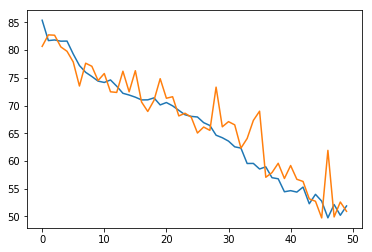

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

m (30, 3)


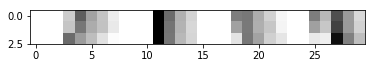

In [46]:
x = vae.predict(x_train[:10])
plot.multi(x[0, :30])

m (30, 3)


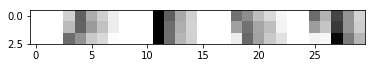

In [57]:
plot.multi(x[3, :30])

m (30, 3)


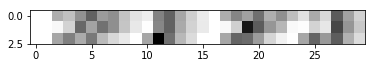

In [84]:
# interpolate - mean
m = x.mean(axis=0)
plot.multi(m[:30])

m (30, 3)


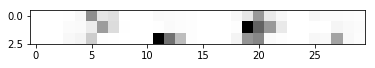

In [85]:
# interpolate - min: these pixels are 'always' active
m = x.min(axis=0)
plot.multi(m[:30])

In [58]:
# build a model to project inputs on the latent space
encoder = Model(encoder_input, z_mean)

In [59]:
x_test.shape

(100, 150, 3)

In [60]:
m = 100
x_train_encoded = encoder.predict(x_train[:m], batch_size=batch_size)
x_train_encoded.shape

(100, 2)

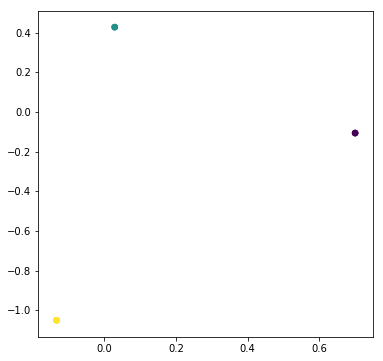

In [61]:
# y_test = range(x_train_encoded.shape[0])
y_test = np.concatenate([list(range(n)) for _ in range(int(m/n)+1)])[:m] / n
plt.figure(figsize=(6, 6))
plt.scatter(x_train_encoded[:, 0], x_train_encoded[:, 1], c=y_test, alpha=0.1, s=30)

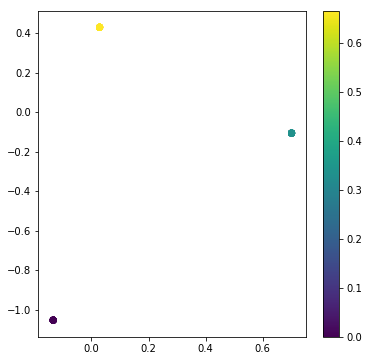

In [62]:
# display a 2D plot of the digit classes in the latent space
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

In [65]:
# build a digit generator that can sample from the learned distribution
decoder_input = Input(shape=(latent_dim,))
_decoded = utils.composition(decoders, decoder_input, verbose=False)
generator = Model(decoder_input, _decoded)

In [74]:
# x_decoded[0].reshape(150,3)

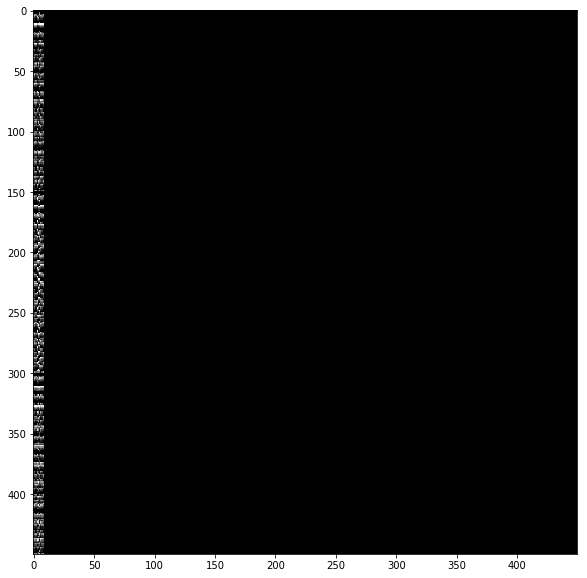

In [76]:
# display a 2D manifold of the digits
n = 3  # figure with 15x15 digits
digit_size1 = x_decoded.shape[-2]
digit_size2 = x_decoded.shape[-1]
figure = np.zeros((digit_size1 * n, digit_size1 * n))
# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        z_sample = np.tile(z_sample, batch_size).reshape(batch_size, 2)
        x_decoded = generator.predict(z_sample, batch_size=batch_size)
        digit = x_decoded[0].reshape(digit_size1, digit_size2)
        figure[i * digit_size1: (i + 1) * digit_size1,
               j * digit_size2: (j + 1) * digit_size2] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()